<a href="https://colab.research.google.com/github/LukaLujan/Loan-Approval-Prediction/blob/main/zahtjev_za_kredit_aplikacija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Moj osobni projekt , gdje na temelju jednog online dataseta radim aplikaciju koja se temelji na strojnom učenju - aplikacija bi sama procjenjivala pouzdanost da li se nekoj trećoj osobi isplati dati kredit ili ne - na temelju određene baze podataka. Projekt je većinom gotov, pronašli smo najbolji model, ali je potrebna još malo dodatna analiza i te napraviti određeni API. 
Naravno dataset i nije toliko velik, (614 redaka i 10ak stupaca) ali uz veći data set , na gotovo sličan način se može isto primjeniti i za aplikaciju u realnom svijetu. 


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
#Uvozimo početni alat

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#lodanje data_seta sa kaggle-a
df =pd.read_csv("train_loan.csv")

In [ ]:
print(len(df))
df.head()

614


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#prvi pregled, koliko ima missing , što su kategorijske a što brojčane varijable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#gdje nedostaju podaci
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#statistički podaci pojedinih varijabli, detalje ćemo analizirati
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#promjena imena stupova u Hrvatski jezik;
df.rename(columns = {'Loan_ID':'Kreditni_Broj','Gender':'Spol', 'Married':'Bračni_Status','Dependents':'Broj_Djece', 'Education':'Fakultet','Self_Employed':'Samo_Zaposlen', 'ApplicantIncome':'Mjesečni_Prihod',
'CoapplicantIncome':'Prihod_Jamca', 'LoanAmount':'Iznos_Kredita', 'Loan_Amount_Term':'Vremenski_Period', 'LoanAmount':'Iznos_Kredita', 'Credit_History':'Kreditna_Povijest','Property_Area':'Vrsta_Naselja','Loan_Status':'Kreditni_Status'}, inplace = True)

In [ ]:
df.head()

,Kreditni_Broj,Spol,Bračni_Status,Broj_Djece,Fakultet,Samo_Zaposlen,Mjesečni_Prihod,Prihod_Jamca,Iznos_Kredita,Vremenski_Period,Kreditna_Povijest,Vrsta_Naselja,Kreditni_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.loc[df["Prihod_Jamca"]!=0]["Prihod_Jamca"].mean()

2919.1933137496776

In [ ]:
df.loc[df["Prihod_Jamca"]!=0]["Mjesečni_Prihod"].mean()

3993.032258064516

In [ ]:
df["Spol"].replace({"Male": "M", "Female": "Ž"}, inplace=True)

In [ ]:
df["Bračni_Status"].replace({"No": "Ne", "Yes": "Da"}, inplace=True)

In [ ]:
df["Fakultet"].replace({"Not Graduate": "Ne", "Graduate": "Da"}, inplace=True)

In [ ]:
df["Broj_Djece"].replace({"0": 0, "1": 1 , "2": 2 ,"3+": 3}, inplace=True)


In [ ]:
df["Samo_Zaposlen"].replace({"No": "Ne", "Yes": "Da"}, inplace=True)

In [ ]:
df["Vrsta_Naselja"].replace({"Urban": "Grad", "Semiurban": "Predgrađe" , "Rural ":"Selo"}, inplace=True)

Ako bi htjeli vidjeti kako ovo izgleda u situaciji Hrvatske morali smo pretvoriti Američke numeričke novčane vrijednosti tipa $ u kune. Naravno da najlakši način je uzeti tečaj na HNBu i prebaciti. 
Međutim ne ide to tako u ekonomiji. Ja sam za baznu godinu uzeo 2019. Pogledao sam stanje tečaja u toj godini. Zatim sam našao razliku između PPPa Hrvatske ekonomije i Američke. Naime PPP ne mjeri 
samo bdp/capita, nego u obzir uzima kupovnu moć i troškove. Nisu isti troškovi života u RH i USA. u USA su neke stvari jeftinije tipa gorivo, međutim školovanje, nekretnine, i zdravstvo je po nekoliko desetaka
puta skuplje nego u RH naprimjer. I onda sam tako napravio konverziju i dobio sam naprimjer prosječne Hrvatske plaće u PPPu. Naravno nije niti to "idealno" ali je dosta preciznija mjera.

In [ ]:
df["Kreditni_Status"].replace({"Y": "Pozitivan", "N": "Negativan"}, inplace=True)

In [ ]:
N#https://www.statista.com/statistics/243842/annual-mean-wages-and-salary-per-employee-in-the-us/

#2019 -66 800  -year  - montly  5567$

#https://www.teb.hr/novosti/2020/prosjecna-mjesecna-isplacena-neto-placa-i-bruto-placa-po-zaposlenome-u-pravnim-osobama-republike-hrvatske-za-2019-nar-nov-br-2420/

#prosječna neto plaća 2019 , 6450 kn =980$

#5567/980 =5.68 puta veća plaća u dolarima - nominalno
# u PPPu , Hrvatska plaća radi troškova u prosjeku dva puta više vrijedi u odnosu na USA, to je 1960$, ili 2.84x 

#1$ 6.6kn 2019godina

#https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?locations=HR bdp ppp 30k $ 2019
#https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?locations=HR     bdp nominal 15$ 2019

In [ ]:
#dakle Američku plaću treba srezati na Hrvatsku PPP razinu(smanjiti je za 2.84 puta) zatim je pretvoriti u Kune po tečaju iz 2019

Sada kada smo dobili da je USA BDP/capita 2.84 puta veći od Hrvatskog ,a dolar 6.6 puta(bazna godina 2019) napravili smo brojčane korekcije. Prvo smo pomnožili Američke plaće sa 6.6 i dobili smo ih u Kunama. Zatim smo ih podijelili sa 2.84 i dobili smo otprilike omjer Hrvatskih PPP plaća u odnosu na Američki standard. 


In [ ]:
df["Mjesečni_Prihod_PPP"]=df["Mjesečni_Prihod"].apply(lambda x: round(x/2.84*6.6))

In [ ]:
df["Prihod_Jamca_PPP"]=df["Prihod_Jamca"].apply(lambda x: round(x/2.84*6.6))

In [ ]:
df["Iznos_Kredita_PPP"]=df["Iznos_Kredita"].map(lambda x: round(x/2.84*6.6), na_action='ignore')          

In [ ]:
df.drop(columns=["Kreditni_Broj", "Mjesečni_Prihod", "Prihod_Jamca", "Iznos_Kredita"], axis=1, inplace=True)

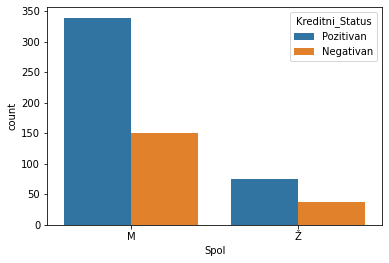

In [ ]:
#Iz ovoga se vidi da spol nije kritična varijabla za vraćanje kredita
sns.countplot(x="Spol",  hue="Kreditni_Status" ,data=df)

Da bi grafički vidjeli da li broj djece utječe na sposobnost vraćanja kredita morao sam obaviti nekoliko koraka. Zaključak je da postoji neka manja korelacija

In [ ]:

Zero =round(df.loc[df["Broj_Djece"]==0]["Kreditni_Status"].value_counts(normalize=True),2)[1]
One =round(df.loc[df["Broj_Djece"]==1]["Kreditni_Status"].value_counts(normalize=True),2)[1]
Twos =round(df.loc[df["Broj_Djece"]==2]["Kreditni_Status"].value_counts(normalize=True),2)[1]
Three_plus =round(df.loc[df["Broj_Djece"]==3]["Kreditni_Status"].value_counts(normalize=True),2)[1]

In [ ]:
print(Zero, One, Twos, Three_plus)

0.31 0.35 0.25 0.35


In [ ]:
dep_labels =["Nula", "Jedno", "Dvoje", "+Tri"]
dep_values =[Zero, One, Twos, Three_plus]

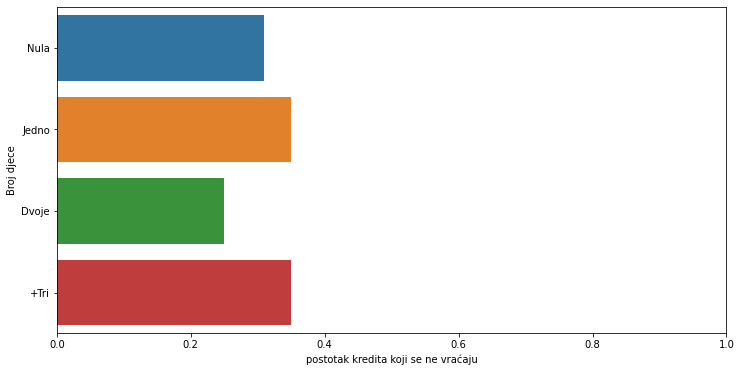

In [ ]:
f, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=dep_values,y=dep_labels)
ax.set(xlim=(0, 1), ylabel="Broj djece",
       xlabel="postotak kredita koji se ne vraćaju");

In [ ]:
faks0  = round(df.loc[df["Fakultet"]=="Da"]["Kreditni_Status"].value_counts(normalize=True),2)[0]
faks1  = round(df.loc[df["Fakultet"]=="Da"]["Kreditni_Status"].value_counts(normalize=True),2)[1]
Nfaks0 = round(df.loc[df["Fakultet"]=="Ne"]["Kreditni_Status"].value_counts(normalize=True),2)[0]
Nfaks1 = round(df.loc[df["Fakultet"]=="Ne"]["Kreditni_Status"].value_counts(normalize=True),2)[1]

In [ ]:
postoci =faks0, faks1, Nfaks0, Nfaks1
postoci =list(postoci)
postoci

[0.71, 0.29, 0.61, 0.39]

In [ ]:
def swapPositions(list, pos1, pos2):
 
    # Storing the two elements
    # as a pair in a tuple variable get
    get = list[pos1], list[pos2]
      
    # unpacking those elements
    list[pos2], list[pos1] = get
      
    return list

pos1, pos2  = 1, 2

In [ ]:
swapPositions(postoci, pos1, pos2)

[0.71, 0.61, 0.29, 0.39]

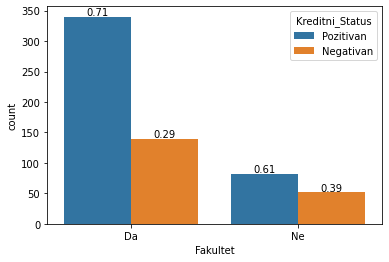

In [ ]:
#Zajmoprimci koji su završili fakultet imaju nešto veću stopu vraćanja kredita
ax=sns.countplot(x="Fakultet",  hue="Kreditni_Status" ,data=df)
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 2, postoci[i],ha="center")

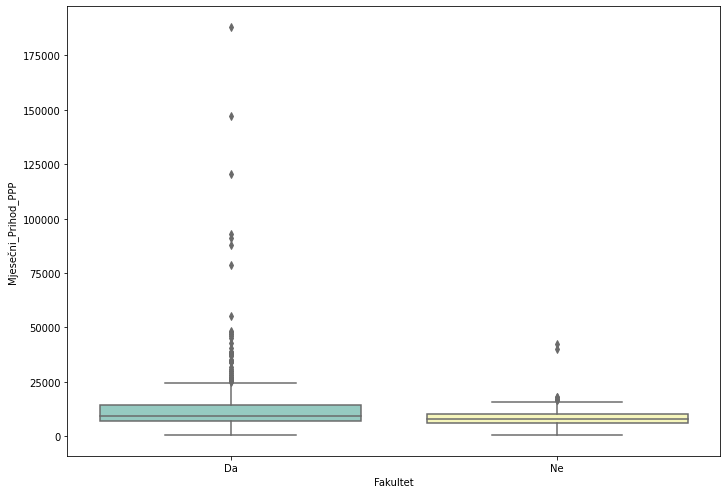

In [ ]:
#Iz priloženog se vidi da ljudi koji su završili fakultet u pravilu zarađuju malo više, međutim među njima ima puno više "outlinera"
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x="Fakultet", y="Mjesečni_Prihod_PPP",
                 data=df, palette="Set3");

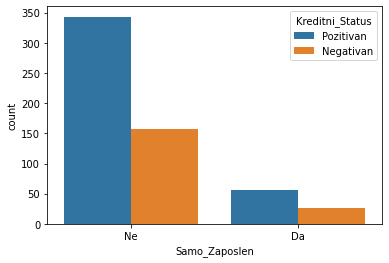

In [ ]:
sns.countplot(x="Samo_Zaposlen", hue="Kreditni_Status", data=df);

In [ ]:
#Velika većina ljudi je uzela kredit na preko 360 mjeseci ili 30 godina
df["Vremenski_Period"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Vremenski_Period, dtype: int64

In [ ]:
df.head()

,Spol,Bračni_Status,Broj_Djece,Fakultet,Samo_Zaposlen,Vremenski_Period,Kreditna_Povijest,Vrsta_Naselja,Kreditni_Status,Mjesečni_Prihod_PPP,Prihod_Jamca_PPP,Iznos_Kredita_PPP
0,M,Ne,0.0,Da,Ne,360.0,1.0,Grad,Pozitivan,13593,0,NaN
1,M,Da,1.0,Da,Ne,360.0,1.0,Rural,Negativan,10651,3505,297.0
2,M,Da,0.0,Da,Da,360.0,1.0,Grad,Pozitivan,6972,0,153.0
3,M,Da,0.0,Ne,Ne,360.0,1.0,Grad,Pozitivan,6003,5480,279.0
4,M,Ne,0.0,Da,Ne,360.0,1.0,Grad,Pozitivan,13944,0,328.0


In [ ]:
palette1 = sns.color_palette(["#E5951D","#1D31E5"])

In [ ]:
palette2 = sns.color_palette(["#1D31E5","#E5951D"])

In [ ]:
df.loc[df["Kreditna_Povijest"]==1]["Kreditni_Status"].value_counts(normalize=True)

Pozitivan    0.795789
Negativan    0.204211
Name: Kreditni_Status, dtype: float64

Iz iduća dva grafička prikaza možemo vidjeti da je kredinta prošlost značajna varijabla. Osobe koje su imale kreditnu povijest 1 - dakle vraćali u prošlosti kredit - u pravilu uspješno vraćaju kredit. I obrnuto , osobe čija je kreditna povijest bila 0 , u pravilu ne vraćaju kredit. Vjerojatno bi se model odmah na prvu mogao izgraditi samo oko ove varijable

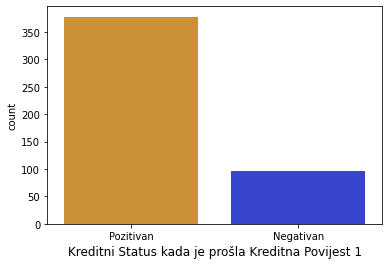

In [ ]:
sns.countplot(x="Kreditni_Status", data=df.loc[df["Kreditna_Povijest"]==1], palette=palette1)
plt.xlabel("Kreditni Status kada je prošla Kreditna Povijest 1", fontsize=12);
 

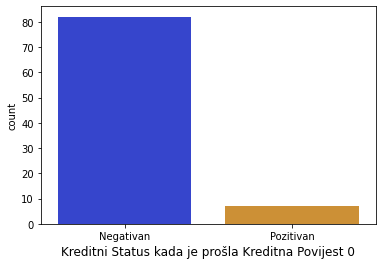

In [ ]:
sns.countplot(x="Kreditni_Status", data=df.loc[df["Kreditna_Povijest"]==0], palette=palette2)
plt.xlabel("Kreditni Status kada je prošla Kreditna Povijest 0", fontsize=12);

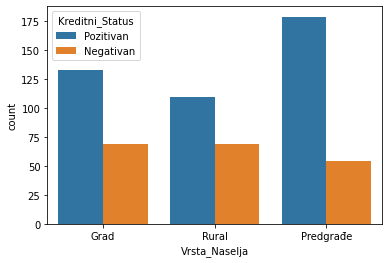

In [ ]:
sns.countplot(x="Vrsta_Naselja",  hue="Kreditni_Status" ,data=df);

In [ ]:
std=round(df['Iznos_Kredita_PPP'].std())
mn=round(df['Iznos_Kredita_PPP'].mean())

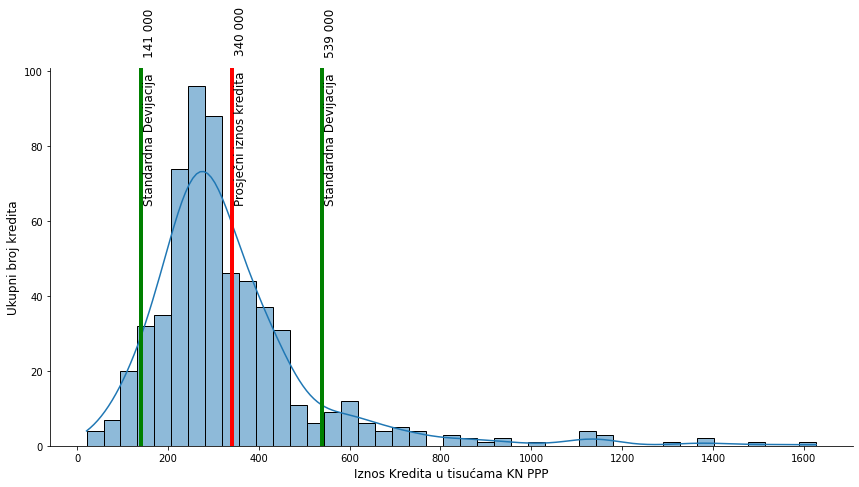

In [ ]:
sns.displot(df['Iznos_Kredita_PPP'],kde=True, height=6, aspect=12/6)
plt.axvline(df['Iznos_Kredita_PPP'].mean(),color="r", linewidth=4 )
plt.axvline(df['Iznos_Kredita_PPP'].mean()+std,color="g", linewidth=4 )
plt.axvline(df['Iznos_Kredita_PPP'].mean()-std,color="g", linewidth=4 )
plt.text(df['Iznos_Kredita_PPP'].mean()+5,65, f'Prosječni iznos kredita    {mn} 000',rotation=90, fontsize=12)
plt.text(df['Iznos_Kredita_PPP'].mean()+std+5,65, f'Standardna Devijacija    {round(mn+std)} 000',rotation=90, fontsize=12)
plt.text(df['Iznos_Kredita_PPP'].mean()-std+5,65, f'Standardna Devijacija    {round(mn-std)} 000',rotation=90, fontsize=12)
plt.ylabel("Ukupni broj kredita", fontsize=12);
plt.xlabel("Iznos Kredita u tisućama KN PPP", fontsize=12);

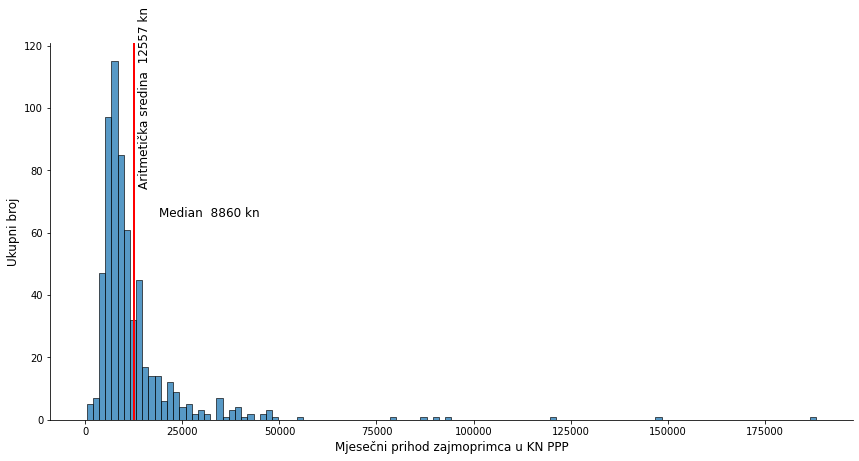

In [ ]:
apl_mean= round(df['Mjesečni_Prihod_PPP'].mean())
apl_median =round(df['Mjesečni_Prihod_PPP'].median())
sns.displot(df['Mjesečni_Prihod_PPP'], height=6, aspect=12/6)
plt.axvline(df['Mjesečni_Prihod_PPP'].mean(),color="r", linewidth=2 )
plt.text(df['Mjesečni_Prihod_PPP'].mean()+1000,75, f'Aritmetička sredina  {apl_mean} kn',rotation=90, fontsize=12)
plt.text(df['Mjesečni_Prihod_PPP'].median()+10000,65, f'Median  {apl_median} kn',rotation=0, fontsize=12)
plt.ylabel("Ukupni broj", fontsize=12);
plt.xlabel("Mjesečni prihod zajmoprimca u KN PPP", fontsize=12);


In [ ]:
df.loc[df['Prihod_Jamca_PPP']>0]['Prihod_Jamca_PPP'].mean()

6784.076246334311

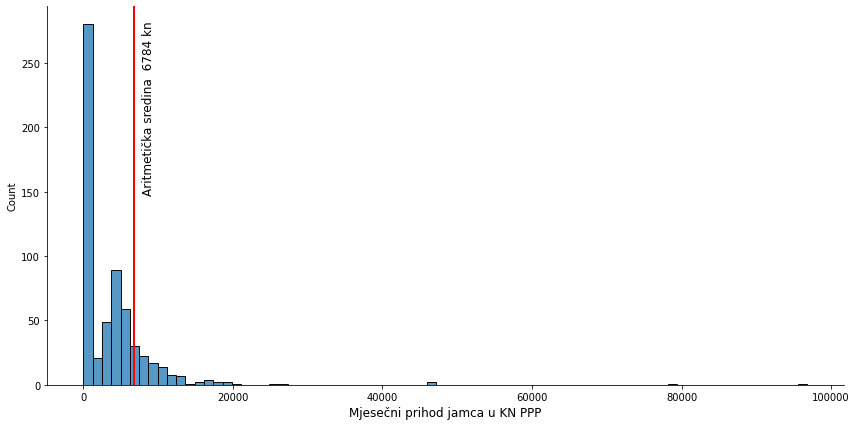

In [ ]:
copl_mean=df.loc[df['Prihod_Jamca_PPP']>0]['Prihod_Jamca_PPP'].mean()
sns.displot(df['Prihod_Jamca_PPP'], height=6, aspect=12/6)
plt.axvline(df.loc[df['Prihod_Jamca_PPP']>0]['Prihod_Jamca_PPP'].mean(),color="r", linewidth=2 )
plt.text(df.loc[df['Prihod_Jamca_PPP']>0]['Prihod_Jamca_PPP'].mean()+1000,150, f'Aritmetička sredina  {round(copl_mean)} kn',rotation=90, fontsize=12)
plt.xlabel("Mjesečni prihod jamca u KN PPP", fontsize=12);

In [ ]:
df["Vremenski_Period"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Vremenski_Period, dtype: int64

In [ ]:
round(df["Kreditni_Status"].value_counts(normalize=True),2)

Pozitivan    0.69
Negativan    0.31
Name: Kreditni_Status, dtype: float64

In [ ]:
X =df.drop(["Kreditni_Status"], axis=1)
y =df["Kreditni_Status"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

Vrijeme je za preprocesing. Računalo ne razumije  slova i riječi , nego brojeve.  Sve kategorije ćemo one_hot_encode odnosno pretvoriti u jedinice i nule. Čak i neke brojačne vrijednosti tipa broj djece ili vremenski period bi se teoretski moglo pretvoriti u nekoliko kategorija. Zatim treba popuniti sve "rupe". Jedan od načina jest da ih sve izbacimo. Međutim pošto imamo dosta "missing values" , a svega 614 redova sa podacima, odlučio sam na popunjavanje. Brojčane vrijednosti popunjavamo aritmetičkom sredinom, a kategoričke vrijednosti popunjavam sa "najčešćom" vrijednosti. Naprimjer ako ne znamo kojeg je spola osoba, a najveća vjerojatnost je da je muško, onda stavljam muško. Za neke kategorije je moguće stvoriti "missing" parametar. To je područje gdje se može experimentirati

In [ ]:


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
imp = SimpleImputer()
ohe = OneHotEncoder(handle_unknown = 'ignore')

In [ ]:
imp.fit_transform(df[["Iznos_Kredita_PPP"]])

In [ ]:
imp_constant = SimpleImputer(strategy='constant', fill_value='missing')

In [ ]:
imp_frequent = SimpleImputer(strategy="most_frequent")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [ ]:
imp_ohe_costant = make_pipeline(imp_constant, ohe)
imp_ohe_frequent = make_pipeline(imp_frequent, ohe)

In [ ]:
df.isna().sum()

Spol                   13
Bračni_Status           3
Broj_Djece             15
Fakultet                0
Samo_Zaposlen          32
Vremenski_Period       14
Kreditna_Povijest      50
Vrsta_Naselja           0
Kreditni_Status         0
Mjesečni_Prihod_PPP     0
Prihod_Jamca_PPP        0
Iznos_Kredita_PPP      22
dtype: int64

In [ ]:
df.columns

Index(['Spol', 'Bračni_Status', 'Broj_Djece', 'Fakultet', 'Samo_Zaposlen',
       'Vremenski_Period', 'Kreditna_Povijest', 'Vrsta_Naselja',
       'Kreditni_Status', 'Mjesečni_Prihod_PPP', 'Prihod_Jamca_PPP',
       'Iznos_Kredita_PPP'],
      dtype='object')

In [ ]:
#ovdje radimo column transformer, koji će popunjavati sve prazne vrijednosti sa unaprijed određenim parametrima
ct = make_column_transformer(
    (imp_ohe_frequent, ['Spol', 'Bračni_Status',"Broj_Djece" ,"Fakultet","Samo_Zaposlen","Vremenski_Period","Vrsta_Naselja", "Kreditna_Povijest"]),
    (imp, ['Iznos_Kredita_PPP']),
    remainder='passthrough')

In [ ]:
df.isnull().sum()

Spol                   13
Bračni_Status           3
Broj_Djece             15
Fakultet                0
Samo_Zaposlen          32
Vremenski_Period       14
Kreditna_Povijest      50
Vrsta_Naselja           0
Kreditni_Status         0
Mjesečni_Prihod_PPP     0
Prihod_Jamca_PPP        0
Iznos_Kredita_PPP      22
dtype: int64

In [ ]:
X_train.isnull().sum()

Spol                   10
Bračni_Status           2
Broj_Djece             11
Fakultet                0
Samo_Zaposlen          25
Vremenski_Period        9
Kreditna_Povijest      37
Vrsta_Naselja           0
Mjesečni_Prihod_PPP     0
Prihod_Jamca_PPP        0
Iznos_Kredita_PPP      17
dtype: int64

In [ ]:
X_test.isnull().sum()

Spol                    3
Bračni_Status           1
Broj_Djece              4
Fakultet                0
Samo_Zaposlen           7
Vremenski_Period        5
Kreditna_Povijest      13
Vrsta_Naselja           0
Mjesečni_Prihod_PPP     0
Prihod_Jamca_PPP        0
Iznos_Kredita_PPP       5
dtype: int64

In [ ]:
#importamo logističku regresiju
logreg =LogisticRegression(solver='lbfgs', max_iter=3000)

In [ ]:
#stvaramo pipeline gdje će model prvo popuniti praznine, zatim će one_hot_encode kategoričke varijable a nakon toga oni idu u logističku regresiju
pipe = make_pipeline(ct, logreg)
pipe.fit(X_train, y_train);

In [ ]:
#rezultat predviđanja
y_preds = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_preds)
print(confusion_matrix)

[[ 28  22]
 [  1 103]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

   Negativan       0.97      0.56      0.71        50
   Pozitivan       0.82      0.99      0.90       104

    accuracy                           0.85       154
   macro avg       0.89      0.78      0.80       154
weighted avg       0.87      0.85      0.84       154



Precision =TP/TP+FP

Recall - true positive rate , TP/TP+FN 

Kod izdavanja kredita, kada gledamo da li je netko pozitivan, gledamo više precision, nije poželjno imati lažno pozitivnih, odnosno ljudi koji neće vraćati kredit. Precision za Pozitivne(oni za koje je procjenjeno) da će vraćati kredit je 0.82%, recall je 0.99 što znači da nije bilo lažno negativnih. odnosno procjenjenih da će biti negative a bili pozitivno.

Kod negativnih slučajeva, precision je jako visok što znači da je velika većina za koje se procjenilo da će neće biti sposobna vraćati kredita - zaista dobro procjenjena. Recall je nizak, što znači da je skoro polovica lažno negativnih, dakle dobili su ocjenu da nisu kreditno sposobni, međutim bili su - tu banka gubi profit, ali nema gubitaka.


In [ ]:
#cross val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

0.7997467679594829

In [ ]:
#hyperparametar tunning za logističku regresiju
params = {}
params['logisticregression__penalty'] = ['l2']
params['logisticregression__C'] = [0.1, 1, 10]
params

{'logisticregression__C': [0.1, 1, 10], 'logisticregression__penalty': ['l2']}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X, y);

In [ ]:
#najbolji rezultati..
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.066387,0.010263,0.014454,0.003270,0.1,l2,"{'logisticregression__C': 0.1, 'logisticregres...",0.813008,0.772358,0.780488,0.853659,0.819672,0.807837,0.029234,1
1,0.060759,0.007380,0.012931,0.000986,1,l2,"{'logisticregression__C': 1, 'logisticregressi...",0.813008,0.715447,0.780488,0.845528,0.844262,0.799747,0.048437,2
2,0.058314,0.006333,0.013639,0.002365,10,l2,"{'logisticregression__C': 10, 'logisticregress...",0.813008,0.715447,0.796748,0.837398,0.819672,0.796455,0.042548,3


Testiramo druge modele

In [ ]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

In [ ]:

pipe_knn = make_pipeline(ct, knn)
pipe_rf_clf =make_pipeline(ct, rf_clf)
pipe_svc=make_pipeline(ct, SVC())
pipe_xgb =make_pipeline(ct,xgb_clf )

In [ ]:
cross_val_score(pipe_knn, X, y, cv=5, scoring='accuracy').mean()

0.6156337465013995

In [ ]:
cross_val_score(pipe_rf_clf, X, y, cv=5, scoring='accuracy').mean()

0.7817539650806344

In [ ]:
cross_val_score(pipe_svc, X, y, cv=5, scoring='accuracy').mean()

0.6872984139677463

In [ ]:
cross_val_score(pipe_xgb, X, y, cv=5, scoring='accuracy').mean()

0.7899107023857124

In [ ]:
#hyperparameter tunning za xg classifier

params3 = {
        'xgbclassifier__min_child_weight': [1, 5, 10],
        'xgbclassifier__gamma': [0.5, 1, 1.5, 2, 5],
        'xgbclassifier__subsample': [0.6, 0.8, 1.0],
        'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
        'xgbclassifier__max_depth': [3, 4, 5]
        }

In [ ]:
params3

{'xgbclassifier_colsample_bytree': [0.6, 0.8, 1.0],
 'xgbclassifier_gamma': [0.5, 1, 1.5, 2, 5],
 'xgbclassifier_max_depth': [3, 4, 5],
 'xgbclassifier_min_child_weight': [1, 5, 10],
 'xgbclassifier_subsample': [0.6, 0.8, 1.0]}

In [ ]:
params

{'logisticregression__C': [0.1, 1, 10], 'logisticregression__penalty': ['l2']}

In [ ]:
pipe2 =make_pipeline(ct,xgb_clf)

In [ ]:
pipe2.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Spol', 'Bračni_Status',
                                                   'Broj_Djece', 'Fakultet',
                                                   'Samo_Zaposlen',
                                                   'Vremenski_Period',
                                                   'Vrsta_Naselja',
                                                   'Kreditna_Povijest']),
                   

In [ ]:
pipe2.predict(X_test)

In [ ]:
pipe2.score(X_test,y_test)

0.8896103896103896

In [ ]:
cross_val_score(pipe2, X, y, cv=5, scoring='accuracy').mean()

0.7899107023857124

In [ ]:
grid2 = GridSearchCV(estimator=pipe2, param_grid=params3, scoring='accuracy', n_jobs=4, cv=5, verbose=3 )

In [ ]:
grid2.fit(X,y)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Spol',
                                                                          'Bračni_Status',
                                                                          'Broj_Djece',
            

In [ ]:
results2 = pd.DataFrame(grid2.cv_results_)
results2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbclassifier__colsample_bytree,param_xgbclassifier__gamma,param_xgbclassifier__max_depth,param_xgbclassifier__min_child_weight,param_xgbclassifier__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.268730,0.046983,0.025339,0.006811,0.6,0.5,3,1,0.6,"{'xgbclassifier__colsample_bytree': 0.6, 'xgbc...",0.764228,0.756098,0.780488,0.837398,0.803279,0.788298,0.029368,314
1,0.209293,0.005567,0.032189,0.004654,0.6,0.5,3,1,0.8,"{'xgbclassifier__colsample_bytree': 0.6, 'xgbc...",0.756098,0.764228,0.772358,0.837398,0.827869,0.791590,0.034038,290
2,0.197430,0.013377,0.024156,0.002702,0.6,0.5,3,1,1.0,"{'xgbclassifier__colsample_bytree': 0.6, 'xgbc...",0.788618,0.772358,0.780488,0.837398,0.811475,0.798067,0.023605,209
3,0.214210,0.021101,0.031845,0.008255,0.6,0.5,3,5,0.6,"{'xgbclassifier__colsample_bytree': 0.6, 'xgbc...",0.788618,0.756098,0.780488,0.837398,0.819672,0.796455,0.028846,228
4,0.199732,0.014149,0.031317,0.009171,0.6,0.5,3,5,0.8,"{'xgbclassifier__colsample_bytree': 0.6, 'xgbc...",0.780488,0.772358,0.788618,0.837398,0.827869,0.801346,0.026232,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,0.340179,0.012668,0.026280,0.004866,1.0,5,5,5,0.8,"{'xgbclassifier__colsample_bytree': 1.0, 'xgbc...",0.813008,0.780488,0.780488,0.845528,0.819672,0.807837,0.024833,89
401,0.331564,0.010374,0.031356,0.007023,1.0,5,5,5,1.0,"{'xgbclassifier__colsample_bytree': 1.0, 'xgbc...",0.813008,0.780488,0.780488,0.853659,0.819672,0.809463,0.027383,17
402,0.284832,0.009019,0.028883,0.002725,1.0,5,5,10,0.6,"{'xgbclassifier__colsample_bytree': 1.0, 'xgbc...",0.813008,0.780488,0.780488,0.853659,0.819672,0.809463,0.027383,17
403,0.297163,0.016258,0.026780,0.002183,1.0,5,5,10,0.8,"{'xgbclassifier__colsample_bytree': 1.0, 'xgbc...",0.813008,0.780488,0.780488,0.853659,0.819672,0.809463,0.027383,17


In [ ]:
grid2.best_params_

{'xgbclassifier__colsample_bytree': 1.0,
 'xgbclassifier__gamma': 5,
 'xgbclassifier__max_depth': 5,
 'xgbclassifier__min_child_weight': 1,
 'xgbclassifier__subsample': 0.6}